<a href="https://colab.research.google.com/github/phoebewang59/TSDP/blob/main/TDSP_Phoebe_Wang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries and packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Motor_Vehicle_Collisions_-_Crashes.csv")

<ipython-input-4-d8f9a1ac3e13>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Motor_Vehicle_Collisions_-_Crashes.csv")


# **Data Exploration**

In [5]:
# First 5 rows of the data
data.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [6]:
# Summary statistics
desc_stats = data.describe()
desc_stats

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.911572e+06,1.911572e+06,2.151150e+06,2.151137e+06,2.151168e+06,2.151168e+06,2.151168e+06,2.151168e+06,2.151168e+06,2.151168e+06,2.151168e+06
mean,4.061878e+01,-7.373590e+01,3.199614e-01,1.544300e-03,5.823813e-02,7.656306e-04,2.796667e-02,1.199348e-04,2.295232e-01,6.303552e-04,3.215618e+06
std,2.068666e+00,3.873375e+00,7.083777e-01,4.146681e-02,2.474319e-01,2.822509e-02,1.670092e-01,1.099319e-02,6.695449e-01,2.746892e-02,1.507193e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066752e+01,-7.397469e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.173912e+06
50%,4.072052e+01,-7.392705e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.711852e+06
75%,4.076961e+01,-7.386673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.249873e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.787900e+06




---



In [7]:
# Check for missing values

missing_values = data.isnull().sum()

# Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(data)) * 100

# Return counts and percentages of missing values in each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_data.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
VEHICLE TYPE CODE 5,2141837,99.566236
CONTRIBUTING FACTOR VEHICLE 5,2141540,99.552429
VEHICLE TYPE CODE 4,2117169,98.419510
CONTRIBUTING FACTOR VEHICLE 4,2115904,98.360705
VEHICLE TYPE CODE 3,2002017,93.066511
CONTRIBUTING FACTOR VEHICLE 3,1996155,92.794008
OFF STREET NAME,1781236,82.803203
CROSS STREET NAME,820302,38.132865
ZIP CODE,666730,30.993860
BOROUGH,666464,30.981495


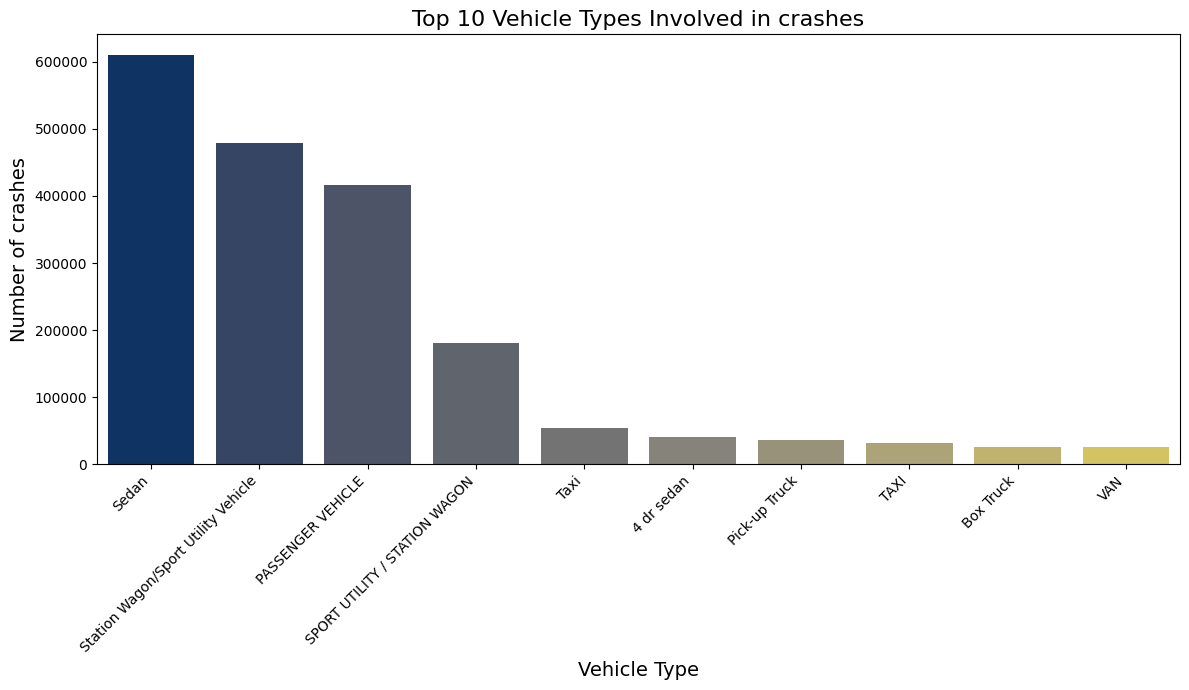

In [ ]:
# Determine the top vehicle types involved in crashes
top_vehicle_types = data['VEHICLE TYPE CODE 1'].value_counts().head(10)

# Plotting the top vehicle types
plt.figure(figsize=(12, 7))
sns.barplot(x= top_vehicle_types.index, y= top_vehicle_types.values, palette="cividis")
plt.title('Top 10 Vehicle Types Involved in crashes', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Number of crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Sedans, station wagons, and passenger vehicles are involved in more crashes, injuries, and deaths compared to other vehicle types. This could be due to their higher prevalence on the roads, which inevitably increases the frequency of accidents involving these vehicles. Furthermore, these vehicles are typically person- or family-owned, meaning there may often be more than one person in the car, potentially leading to more distractions, such as chatting or using phones, which could contribute to a higher number of accidents involving these vehicle types.






<ipython-input-9-f37d5982fd92>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")


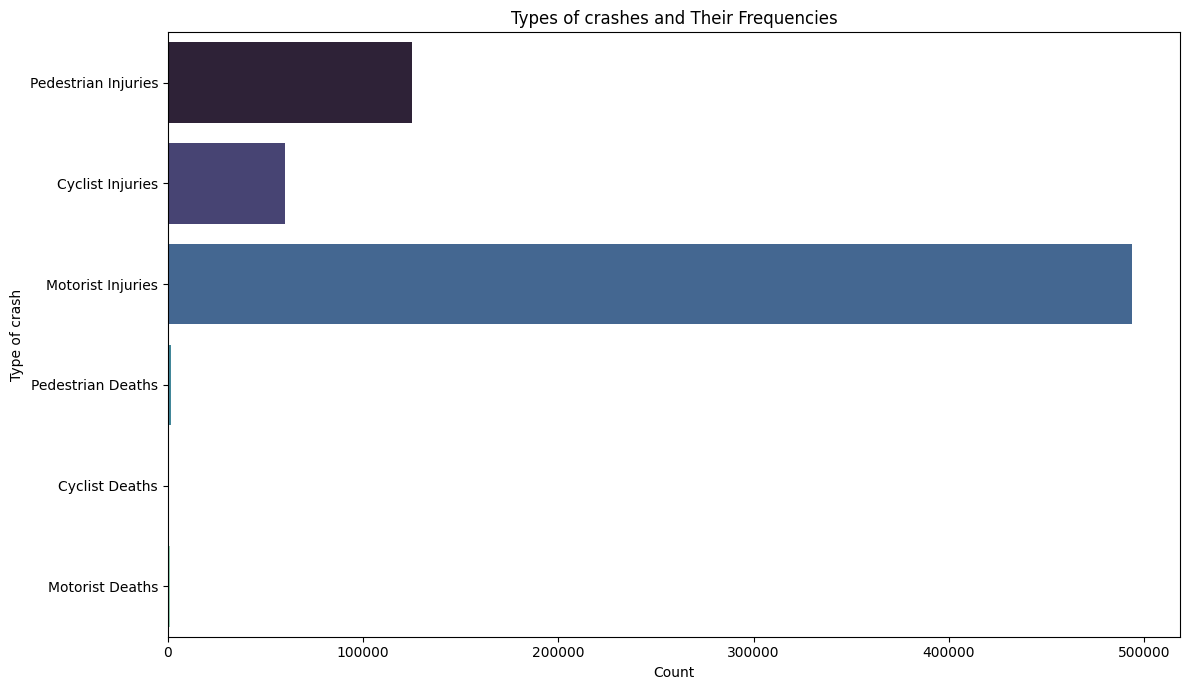

In [9]:
# Aggregating data
types_of_crashes = {
    'Pedestrian Injuries': data['NUMBER OF PEDESTRIANS INJURED'].sum(),
    'Cyclist Injuries': data['NUMBER OF CYCLIST INJURED'].sum(),
    'Motorist Injuries': data['NUMBER OF MOTORIST INJURED'].sum(),
    'Pedestrian Deaths': data['NUMBER OF PEDESTRIANS KILLED'].sum(),
    'Cyclist Deaths': data['NUMBER OF CYCLIST KILLED'].sum(),
    'Motorist Deaths': data['NUMBER OF MOTORIST KILLED'].sum()
}

# Converting to DataFrame for easier plotting
crash_types_df = pd.DataFrame(list(types_of_crashes.items()), columns=['crash Type', 'Count'])

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")
plt.title('Types of crashes and Their Frequencies')
plt.xlabel('Count')
plt.ylabel('Type of crash')
plt.tight_layout()
plt.show()


---

# **Analysis**

## Top 10 Contributing Factors in Crashes

<ipython-input-10-a4036e415836>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_factors.index, y=top_factors.values, palette="colorblind")


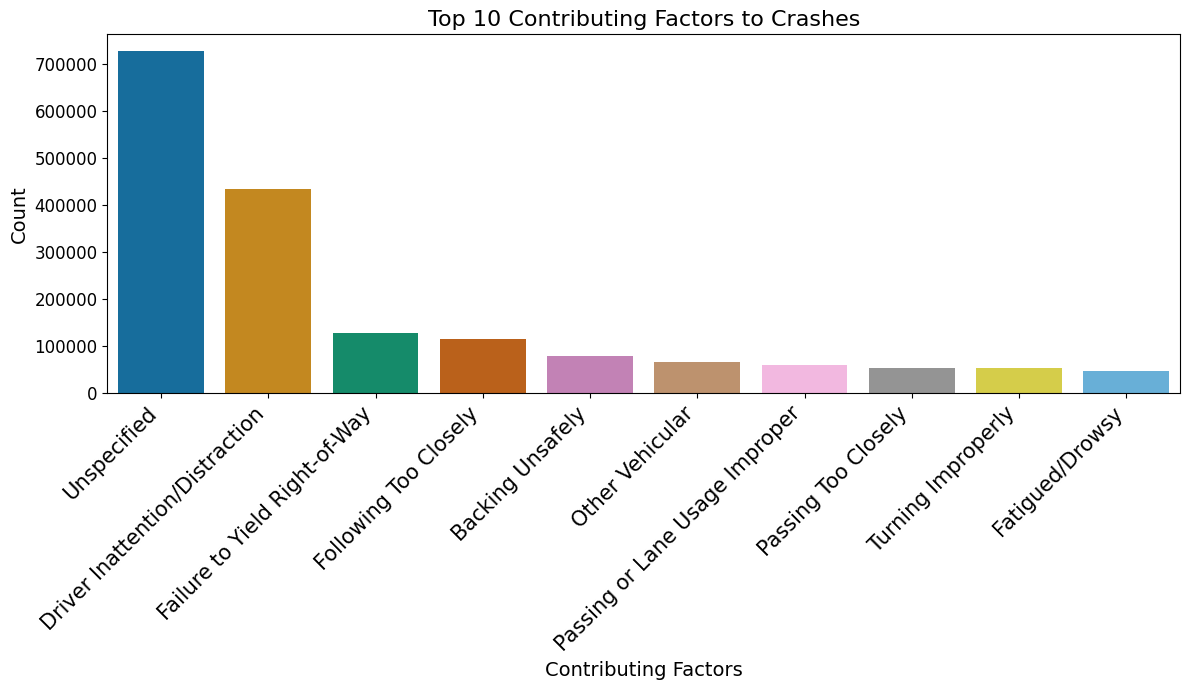

In [10]:
top_factors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x= top_factors.index, y=top_factors.values, palette="colorblind")
plt.title('Top 10 Contributing Factors to Crashes', fontsize=16)
plt.xlabel('Contributing Factors', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=15, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Time Series Analysis: Inattentive driving patterns by time and day


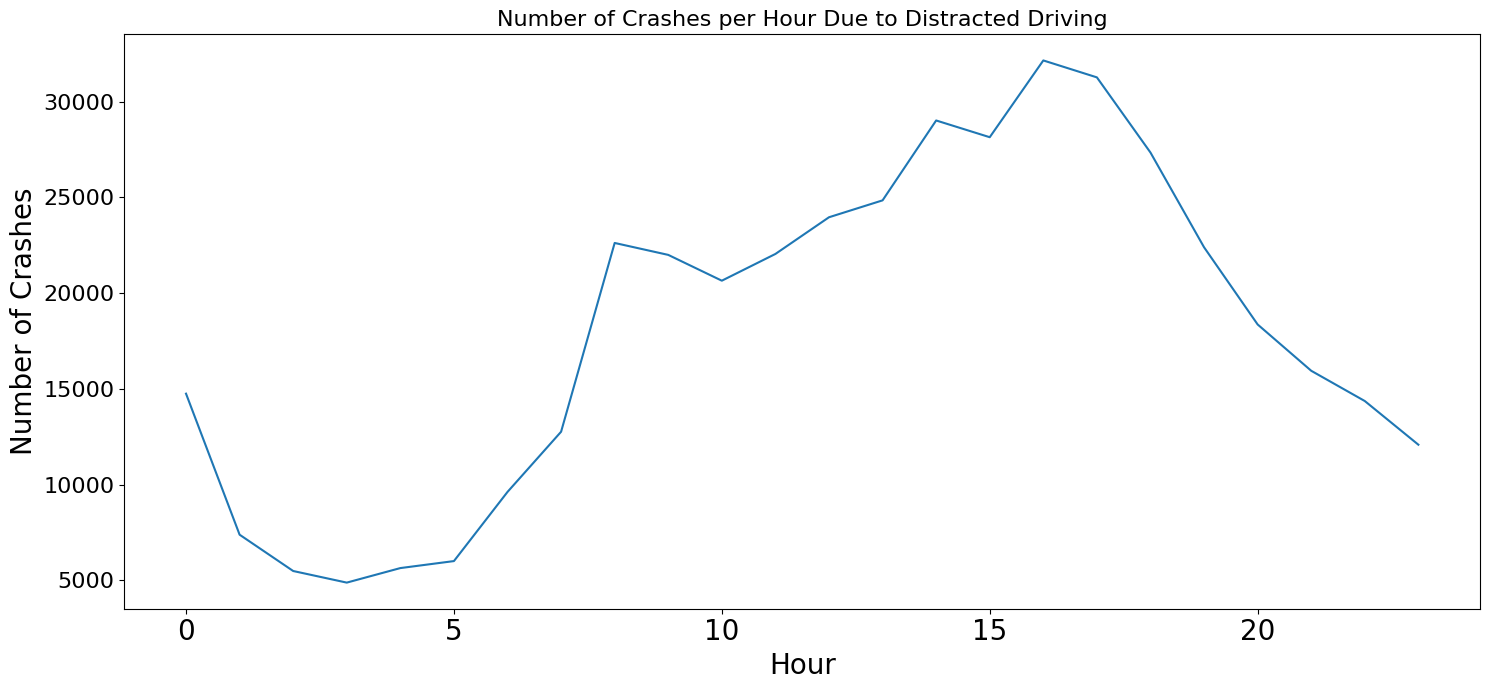

In [ ]:
# Convert 'CRASH DATE' and 'CRASH TIME' to datetime format
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')

# Filter out distracted driving
distracted_driving = data["CONTRIBUTING FACTOR VEHICLE 1"] == "Driver Inattention/Distraction"

# Group by hours to get the number of crashes due to distracted driving per hour
hourly_distracted = data[distracted_driving].groupby(data['CRASH TIME'].dt.hour).size()

plt.figure(figsize=(15, 7))
hourly_distracted.plot()
plt.title('Number of Crashes per Hour Due to Distracted Driving', fontsize=16)
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Number of Crashes', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()


<ipython-input-8-abb6f8b7d00d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= days_of_week, y=weekly_distracted.values, palette="colorblind")


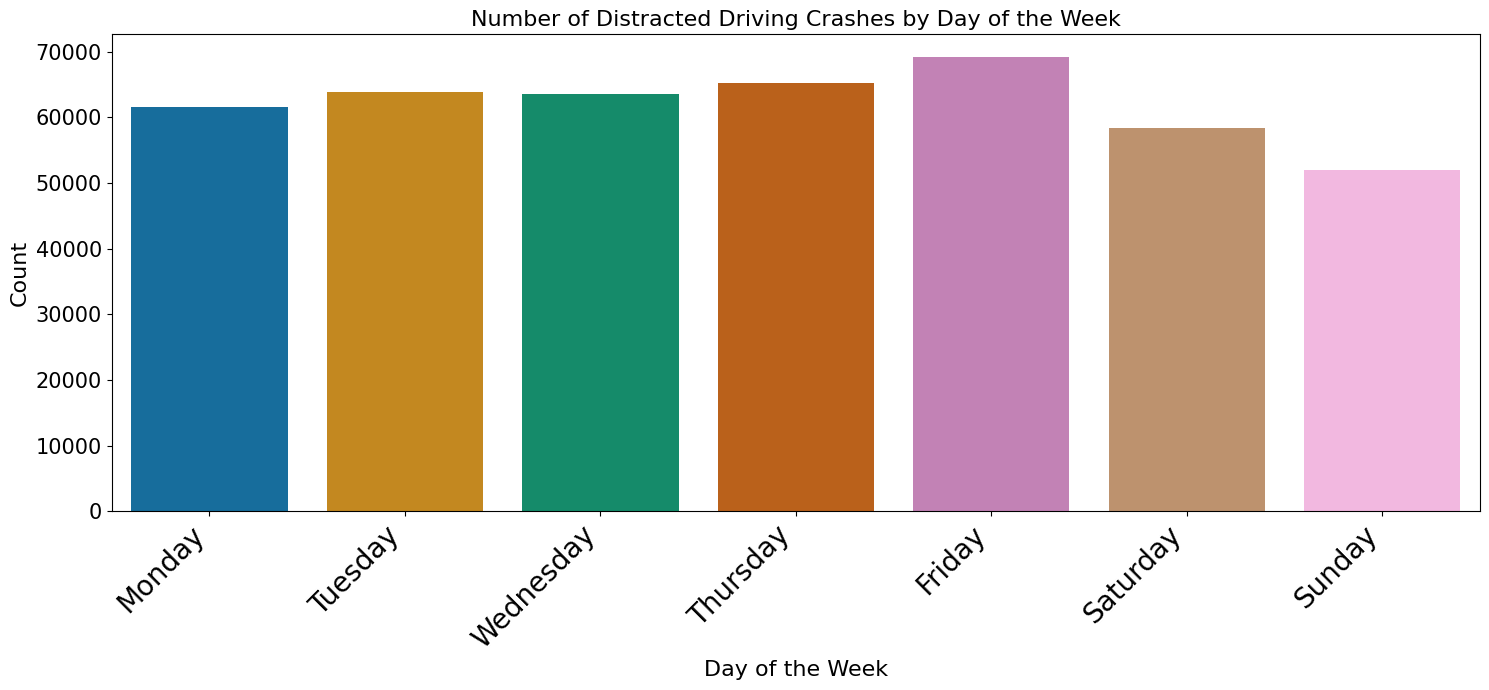

In [ ]:
# Plot the number of distracted driving crashes by day of the week

# Group by days of week to get the number of crashes due to distracted driving per days of week
weekly_distracted = data[distracted_driving].groupby(data['CRASH DATE'].dt.dayofweek).size()

# Create weekday names
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(15, 7))
sns.barplot(x= days_of_week, y=weekly_distracted.values, palette="colorblind")
plt.title('Number of Distracted Driving Crashes by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=20, rotation=45, ha='right')
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()


## Top 3 factors vs. crash severity

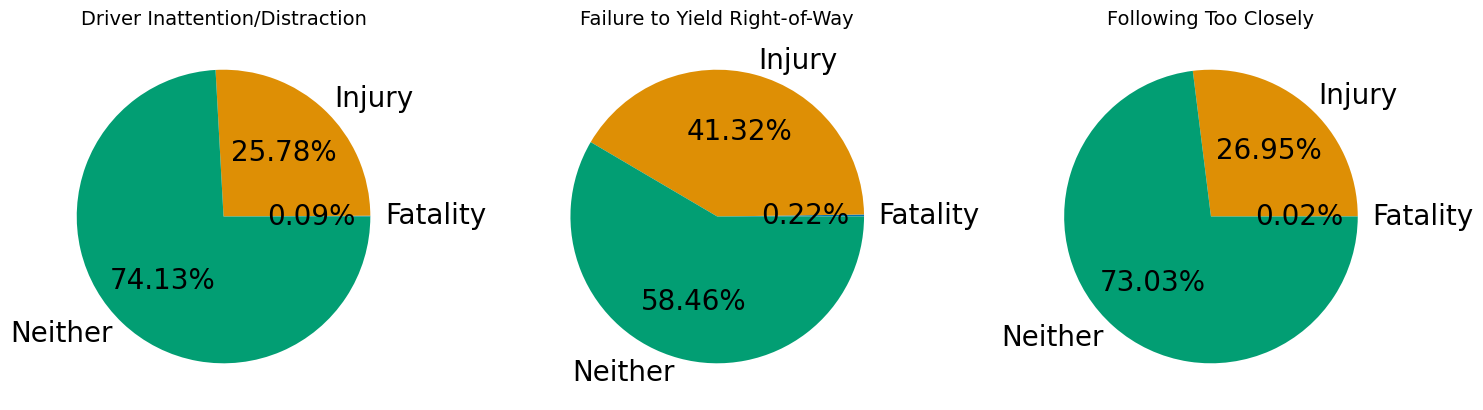

In [ ]:
# Define a function to identify 'fatal', 'injury', and 'neither' categories
def determine_severity(row):
    if row['NUMBER OF PERSONS KILLED'] > 0:
        return 'Fatality'  # Killed
    elif row['NUMBER OF PERSONS INJURED'] > 0:
        return 'Injury'  # Injured
    else:
        return 'Neither'  # Neither injured nor killed

data['SEVERITY'] = data.apply(determine_severity, axis=1)

# Remove rows where the contributing factor is 'Unspecified'
data_filtered = data[data['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# Get the top 3 contributing factors by frequency
top_contributing_factors = data_filtered['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(3).index

# Filter the data to include only the top 3 contributing factors
data_top_factors = data_filtered[data_filtered['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_contributing_factors)]

# Calculate how many accidents there are for each severity level for each top contributing factor
severity_counts = data_top_factors.groupby(['CONTRIBUTING FACTOR VEHICLE 1', 'SEVERITY']).size().unstack(fill_value=0)

# Create a subplot with 3 pie charts (one for each top contributing factor)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create a row of 3 pie charts
axes = axes.flatten()  # Flatten axes to loop through them easily

# Loop through each contributing factor and create a pie chart for it
for i, factor in enumerate(severity_counts.index):
    ax = axes[i]  # Get the subplot for this factor
    severity_data = severity_counts.loc[factor]  # Get the counts of each severity level for this factor
    ax.pie(severity_data,  # Create a pie chart with the severity data
           labels=severity_data.index,  # Label the slices (severity levels)
           autopct='%1.2f%%',  # Show percentages on the slices
           colors=sns.color_palette("colorblind", 3),
           textprops={'fontsize': 20})  # Adjust label font size
    ax.set_title(f'{factor}', fontsize = 14)  # Set the title of the pie chart to the contributing factor name

plt.tight_layout()
plt.show()
